<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Functions" data-toc-modified-id="Functions-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Functions</a></span></li></ul></li><li><span><a href="#Test-InLiDa" data-toc-modified-id="Test-InLiDa-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Test InLiDa</a></span></li><li><span><a href="#Test-LCAS" data-toc-modified-id="Test-LCAS-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test LCAS</a></span></li><li><span><a href="#Test-Own-Data" data-toc-modified-id="Test-Own-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Test Own Data</a></span><ul class="toc-item"><li><span><a href="#Load-test-data-without-labels" data-toc-modified-id="Load-test-data-without-labels-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Load test data without labels</a></span></li></ul></li><li><span><a href="#Summary-of-frame" data-toc-modified-id="Summary-of-frame-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Summary of frame</a></span></li></ul></li><li><span><a href="#Calculate-Bounding-Box-Corners" data-toc-modified-id="Calculate-Bounding-Box-Corners-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calculate Bounding Box Corners</a></span><ul class="toc-item"><li><span><a href="#Source-code" data-toc-modified-id="Source-code-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Source code</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Testing</a></span></li></ul></li><li><span><a href="#Orientation-angle" data-toc-modified-id="Orientation-angle-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Orientation angle</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#Using-Mayavi" data-toc-modified-id="Using-Mayavi-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Using Mayavi</a></span><ul class="toc-item"><li><span><a href="#Source-code" data-toc-modified-id="Source-code-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Source code</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Testing</a></span></li></ul></li><li><span><a href="#Using-Matplotlib" data-toc-modified-id="Using-Matplotlib-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Using Matplotlib</a></span><ul class="toc-item"><li><span><a href="#source-code" data-toc-modified-id="source-code-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>source code</a></span></li><li><span><a href="#Testing" data-toc-modified-id="Testing-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Testing</a></span></li></ul></li></ul></li><li><span><a href="#Validate-Annotations" data-toc-modified-id="Validate-Annotations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Validate Annotations</a></span><ul class="toc-item"><li><span><a href="#Outlier-Detection" data-toc-modified-id="Outlier-Detection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Outlier Detection</a></span></li><li><span><a href="#Validation-Pipeline" data-toc-modified-id="Validation-Pipeline-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Validation Pipeline</a></span></li></ul></li><li><span><a href="#Data-Overview" data-toc-modified-id="Data-Overview-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data Overview</a></span></li><li><span><a href="#Backup" data-toc-modified-id="Backup-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Backup</a></span><ul class="toc-item"><li><span><a href="#Create-PCD-Files" data-toc-modified-id="Create-PCD-Files-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Create PCD Files</a></span></li><li><span><a href="#Visualizations" data-toc-modified-id="Visualizations-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Visualizations</a></span><ul class="toc-item"><li><span><a href="#3D-Plot-using-matplotlib" data-toc-modified-id="3D-Plot-using-matplotlib-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>3D Plot using matplotlib</a></span></li><li><span><a href="#3D-Plot-using-pptk" data-toc-modified-id="3D-Plot-using-pptk-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>3D Plot using pptk</a></span></li></ul></li></ul></li></ul></div>

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import string
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd
import time
import collections
import seaborn as sns 
import ipywidgets as widgets
from IPython.display import display
import h5py

from crowd_tracker_lidar3d.loader import load_data_to_dataframe
from crowd_tracker_lidar3d.plot_tools import plot_pointcloud3d, draw_point_cloud, show_projections
from crowd_tracker_lidar3d.preprocessing import rotate_pcl, df_apply_rot, return_ground_points, \
                                                remove_ground_points, standardize_data, translate_height,\
                                                add_polar_coord, rotate_pcl
from crowd_tracker_lidar3d.cluster_utils import return_cluster_and_noise_points, plot_xy_cluster_results, \
                                                plot_3d_cluster_results
from crowd_tracker_lidar3d.hdf5_util import load_h5, load_h5_basic
from crowd_tracker_lidar3d.annotation_utils import calc_heading_angle
import matplotlib.pyplot as plt 

In [3]:
# Helper Function to save plots 
def save_fig(fig, path, extension='.pdf'):
    save_dir = path + extension
    fig.savefig(save_dir, bbox_inches='tight')  

In [18]:
def save_fig_in_folder(fig, path, keyword=None, name=None):    
    SAVE_DIR = os.path.join(path, 'plots')
    print('Saving figure in {}'.format(SAVE_DIR))

    if not os.path.exists(SAVE_DIR):
        os.makedirs(SAVE_DIR)
    if not name: 
        frame_name = str.rstrip(frame, '.h5')
        if keyword: 
            frame_name = frame_name + '_' + keyword
    else: 
        frame_name = name
    save_fig(fig, os.path.join(SAVE_DIR, frame_name), extension='.pdf')

## Load Data

In [4]:
os.getcwd()
DATA_DIR = os.path.dirname(os.path.abspath(''))

#### Functions 

In [5]:
def get_label_file(frame, label_dir, data_dir):
    frame_name = frame.split('.')[0]
    # print(frame_name)
    frame_idx = int(frame_name.replace('frame',''))
    idx_map = get_idx_map(data_dir, )
    # check if frame annotated
    label_path = os.path.join(label_dir, idx_map[frame_idx]+'.txt') 
    return label_path

In [6]:
def get_idx_map(directory, file_name='idx_map'):
    map_file = os.path.join(directory, '{}.txt'.format(file_name))
    idx_map = {}
    with open(map_file, 'r') as file:
        lines = file.readlines()
        for line in lines: 
            idx, name = line.strip().split(':')
            idx_map[int(idx)] = name
    return idx_map

In [7]:
def get_data_and_labels(idx, data_dir, label_dir,verbose=False, real_frame_id=False): 
    annot_idx_map = get_idx_map(label_dir, file_name='annotated_frames')
    if not real_frame_id:
        frame_ids = list(annot_idx_map.keys())
        frame_id = frame_ids[idx]
        file_name = 'frame{}.h5'.format(frame_id)
    else: 
        file_name = 'frame{}.h5'.format(idx)
    data = load_h5_basic(os.path.join(data_dir, file_name))
    bboxes = load_h5_basic(os.path.join(label_dir, file_name))
    if verbose:
        print('Frame has {} points and {} object(s).'.format(data.shape[0], bboxes.shape[0]))
    return data,bboxes

In [18]:
def get_data(idx, idx_map, data_dir, verbose=False, real_frame_id=False): 
    if not real_frame_id:
        frame_ids = list(idx_map.keys())
        frame_id = frame_ids[idx]
        file_name = 'frame{}.h5'.format(frame_id)
    else: 
        file_name = 'frame{}.h5'.format(idx)
    data = load_h5_basic(os.path.join(data_dir, file_name))
    if verbose:
        print('Frame has {} points.'.format(data.shape[0]))
    return data

### Test InLiDa

In [48]:
seq_id = 5
sequence = 'Sequence{}'.format(seq_id)
data_dir = os.path.join(DATA_DIR, "data/InLiDa/hdf5/{}/".format(sequence))
# label_dir = os.path.join(DATA_DIR, "data/LCAS/annotated_boundbox/{}/".format(sequence))
label = None 

In [56]:
idx=500
idx_map = get_idx_map(data_dir, 'idx_map')
print('Total number of frames: {}'.format(len(idx_map)))
data = get_data(idx, idx_map, data_dir, verbose=True)
bboxes = [] 
corners3d_boxes = []

Total number of frames: 658
Frame has 28866 points.


### Test LCAS 

In [29]:
sequence = '1200_1218'
data_dir = os.path.join(DATA_DIR, "data/LCAS/hdf5/{}/".format(sequence))
label_dir = os.path.join(DATA_DIR, "data/LCAS/annotated_boundbox/{}/".format(sequence))
label = None 

In [35]:
test_id = 1846
data, bboxes = get_data_and_labels(test_id, data_dir, label_dir, verbose=True, real_frame_id=True)
corners3d_boxes = boxes3d_to_corners3d_velodyne(bboxes,rotate=True)

Frame has 26403 points and 2 object(s).


In [177]:
dets = 0 
annot_idx_map = get_annotated_frames(label_dir)
frame_ids = list(annot_idx_map.keys())
for idx in frame_ids: 
    data, bboxes = get_data_and_labels(idx, data_dir, label_dir)
    dets+= bboxes.shape[0]
print('Average detections per scene: {}'.format(float(dets)/float(len(frame_ids))))

Average detections per scene: 9.97938144329897


### Test Own Data

In [78]:
DATA_DIR = os.path.join(DATA_DIR, "data/med/annotated_boundbox/filtered_wo_floor")
print(DATA_DIR)

/home/crowdbot/master_lara/catkin_ws/src/crowd_tracker_lidar3d/data/med/annotated_boundbox/filtered_wo_floor


In [24]:
for folder in sorted(os.listdir(DATA_DIR)):
    print(folder)
    path = os.path.join(DATA_DIR, folder) 
    data_files = [str(f) for f in sorted(os.listdir(path)) if f.endswith('.h5')] 
    break

person166_1


In [15]:
# dist = int(folder.split('_')[-1])
dist = 3
# f = '/home/crowdbot/master_lara/catkin_ws/src/crowd_tracker_lidar3d/data/med/annotated_boundbox/unfiltered/person170_3/frame54.h5'
# f = '/home/crowdbot/master_lara/catkin_ws/src/crowd_tracker_lidar3d/data/med/annotated_boundbox/unfiltered/walk_person185_1/frame160.h5'
f = '/home/crowdbot/master_lara/catkin_ws/src/crowd_tracker_lidar3d/data/med/annotated_boundbox_fixed/walk_person185_6/frame389.h5'

# f = '/home/crowdbot/master_lara/catkin_ws/src/crowd_tracker_lidar3d/data/med/annotated_boundbox/filtered_wo_floor/person166_{}/frame116.h5'.format(dist)
data, label, bboxes = load_h5(f, bbox=True)
bboxes = np.reshape(bboxes, (-1,7))
print(data.shape, label.shape, bboxes.shape)

(8487, 4) (8487,) (1, 7)


In [17]:
data[:, 0:3]
for dim in range(0, data.shape[1]): 
    print(np.min(data[:, dim]), np.max(data[:, dim]))

-4.1941314 41.580185
-36.972237 35.75776
-0.492425 4.3274508
0.48 115.48


#### Load test data without labels

In [62]:
idx = 10 
path = os.path.join(DATA_DIR, "data/med_new/hdf5/crowd_01")
data_files = [str(f) for f in sorted(os.listdir(path)) if f.endswith('.h5')] 
# print(data_files)
data = load_h5_basic(os.path.join(path, data_files[idx]))

### Summary of frame 

In [171]:
for box in bboxes: 
    centroid, h, w, l, angle = box[0:3], box[3], box[4], box[5], box[6]
    print('--------------\nBox parameters: \n\ncentroid {}\nheight {}\nlength {}\angle{}\n'.format(centroid, h,w,l,angle))

if label: 
    mask = np.where(label)
    template = data[mask]
    background_mask = np.where(~label)
    print('Bounding box dimensions:\n {}'.format(bbox))
    print('Human template comprising {} points.'.format(template.shape[0]))

--------------
Box parameters: 

centroid [4.32382   1.19829   0.0958688]
height 1.4155880212783813
length 0.589900016784668ngle0.652180016040802

--------------
Box parameters: 

centroid [-0.520362   2.15718    0.0313196]
height 1.3506139516830444
length 0.5214890241622925ngle0.47284001111984253

--------------
Box parameters: 

centroid [-1.96377   2.05597   0.105498]
height 1.4739569425582886
length 0.6302800178527832ngle0.5539299845695496

--------------
Box parameters: 

centroid [-1.10456    1.71837    0.0328268]
height 1.286944031715393
length 0.5977489948272705ngle0.6176000237464905

--------------
Box parameters: 

centroid [-17.6257    -0.788333   0.102555]
height 0.7208520174026489
length 0.41110000014305115ngle0.6448609828948975

--------------
Box parameters: 

centroid [-3.28167   -2.94146   -0.0591346]
height 0.7329739928245544
length 0.5920000076293945ngle0.6244000196456909

--------------
Box parameters: 

centroid [ 0.656262 -6.18678  -0.051729]
height 0.966323

## Calculate Bounding Box Corners

Below you can find functions in order to calculate the corners for a given bounding box annotation (i.e. [centroid, height, width, length, angle]). All functions are implemented for the _Velodyne coordinate system_ (i.e. x=forward, y=left, z=up). 

### Source code

In [8]:
def calc_3d_box(bbox): 
    x, y, z, h, w, l = bbox[:6]
    box8 = np.array(
        [
            [
                x + w / 2,
                x + w / 2,
                x - w / 2,
                x - w / 2,
                x + w / 2,
                x + w / 2,
                x - w / 2,
                x - w / 2,
            ],
            [
                y - l / 2,
                y + l / 2,
                y + l / 2,
                y - l / 2,
                y - l / 2,
                y + l / 2,
                y + l / 2,
                y - l / 2,
            ],
            [
                z - h / 2,
                z - h / 2,
                z - h / 2,
                z - h / 2,
                z + h / 2,
                z + h / 2,
                z + h / 2,
                z + h / 2,
            ],
        ]
    )
    return box8.T

In [9]:
def draw_gt_boxes3d(
    gt_boxes3d,
    fig,
    color=(1, 1, 1),
    line_width=1,
    draw_text=False,
    text_scale=(1, 1, 1),
    color_list=None,
    label=""
):
    """ Draw 3D bounding boxes in mayavi
    Args:
        gt_boxes3d: numpy array (n,8,3) for XYZs of the box corners
        fig: mayavi figure handler
        color: RGB value tuple in range (0,1), box line color
        line_width: box line width
        draw_text: boolean, if true, write box indices beside boxes
        text_scale: three number tuple
        color_list: a list of RGB tuple, if not None, overwrite color.
    Returns:
        fig: updated fig
    """
    num = len(gt_boxes3d)
    for n in range(num):
        b = gt_boxes3d[n]
        if color_list is not None:
            color = color_list[n]
        if draw_text:
            mlab.text3d(
                b[4, 0],
                b[4, 1],
                b[4, 2],
                label,
                scale=text_scale,
                color=color,
                figure=fig,
            )
        for k in range(0, 4):
            # http://docs.enthought.com/mayavi/mayavi/auto/mlab_helper_functions.html
            i, j = k, (k + 1) % 4
            mlab.plot3d(
                [b[i, 0], b[j, 0]],
                [b[i, 1], b[j, 1]],
                [b[i, 2], b[j, 2]],
                color=color,
                tube_radius=None,
                line_width=line_width,
                figure=fig,
            )

            i, j = k + 4, (k + 1) % 4 + 4
            mlab.plot3d(
                [b[i, 0], b[j, 0]],
                [b[i, 1], b[j, 1]],
                [b[i, 2], b[j, 2]],
                color=color,
                tube_radius=None,
                line_width=line_width,
                figure=fig,
            )

            i, j = k, k + 4
            mlab.plot3d(
                [b[i, 0], b[j, 0]],
                [b[i, 1], b[j, 1]],
                [b[i, 2], b[j, 2]],
                color=color,
                tube_radius=None,
                line_width=line_width,
                figure=fig,
            )
    # mlab.show(1)
    # mlab.view(azimuth=180, elevation=70, focalpoint=[ 12.0909996 , -1.04700089, -2.03249991], distance=62.0, figure=fig)
    return fig

In [10]:
def generate_corners3d(pos,h,w,l,rz):
    """
    Generate corners3d representation (oriented bounding box representation) for this object
    :h,w,l bounding box dimensions 
    :rz rotation angle around z-axis in velodyn coord. (-pi, pi)
        7 -------- 6
       /|         /|
      4 -------- 5 .
      | |        | |
      . 3 -------- 2
      |/         |/
      0 -------- 1
    :return corners_3d: (8, 3) corners of oriented box3d in Velodyne coord.
    """
    # careful: width, length and height have been differently defined than in KITTI
    x_corners = [w / 2, w / 2, -w / 2, -w / 2, w / 2, w / 2, -w / 2, -w / 2]        
    y_corners = [-l / 2, l / 2, l / 2, -l / 2, -l / 2, l / 2, l / 2, -l / 2]
    z_corners = [-h/2, -h/2, -h/2, -h/2, h/2, h/2, h/2, h/2]

    # rotation now defined in Velodyne coords. -> around z-axis => yaw rot. 
    R = np.array([[np.cos(rz), -np.sin(rz), 0],
                  [np.sin(rz), np.cos(rz), 0],
                  [0, 0, 1]])
    corners3d = np.vstack([x_corners, y_corners, z_corners])  # (3, 8)
    # transpose and rotate around orientation angle 
    corners3d = np.dot(R, corners3d).T
    corners3d = corners3d + pos
    return corners3d

In [11]:
def boxes3d_to_corners3d_velodyne(boxes3d, rotate=True):
    """
    :param boxes3d: (N, 7) [x, y, z, h, w, l, ry]
    :param rotate:
    :return: corners3d: (N, 8, 3)
    """

    boxes_num = boxes3d.shape[0]
    h, w, l = boxes3d[:, 3], boxes3d[:, 4], boxes3d[:, 5]
    x_corners = np.array([w / 2., w / 2., -w / 2., -w / 2., w / 2., w / 2., -w / 2., -w / 2.], dtype=np.float32).T  # (N, 8)
    y_corners = np.array([-l / 2., l / 2., l / 2., -l / 2., -l / 2., l / 2., l / 2., -l / 2.], dtype=np.float32).T  # (N, 8)
    z_corners = np.array([-h / 2., -h / 2., -h / 2., -h / 2., h / 2., h / 2., h / 2., h / 2.], dtype=np.float32).T  # (N, 8)

    if rotate:
        rz = boxes3d[:, 6]
        zeros, ones = np.zeros(rz.size, dtype=np.float32), np.ones(rz.size, dtype=np.float32)
        rot_list = np.array([[np.cos(rz), np.sin(rz), zeros],
                             [-np.sin(rz), np.cos(rz), zeros],
                             [zeros, zeros,  ones]])  # (3, 3, N)
        R_list = np.transpose(rot_list, (2, 0, 1))  # (N, 3, 3)

        temp_corners = np.concatenate((x_corners.reshape(-1, 8, 1), y_corners.reshape(-1, 8, 1),
                                       z_corners.reshape(-1, 8, 1)), axis=2)  # (N, 8, 3)
        rotated_corners = np.matmul(temp_corners, R_list)  # (N, 8, 3)
        x_corners, y_corners, z_corners = rotated_corners[:, :, 0], rotated_corners[:, :, 1], rotated_corners[:, :, 2]

    x_loc, y_loc, z_loc = boxes3d[:, 0], boxes3d[:, 1], boxes3d[:, 2]

    x = x_loc.reshape(-1, 1) + x_corners.reshape(-1, 8)
    y = y_loc.reshape(-1, 1) + y_corners.reshape(-1, 8)
    z = z_loc.reshape(-1, 1) + z_corners.reshape(-1, 8)

    corners = np.concatenate((x.reshape(-1, 8, 1), y.reshape(-1, 8, 1), z.reshape(-1, 8, 1)), axis=2)

    return corners.astype(np.float32)

### Testing

In [92]:
# Apprach 1: 
corners3d_box = boxes3d_to_corners3d_velodyne(bboxes)

In [28]:
# Approach 2: - should lead to same result as approach 1 
centroid, h, w, l, rz = bbox[0:3], float(bbox[3]), float(bbox[4]), float(bbox[5]), float(bbox[6])
corners3d_box = generate_corners3d(centroid,h,w,l,rz)
corners3d_box = np.reshape(corners3d_box, (-1,8,3))

In [30]:
# Evaluate deviation from predefined standard pedestrian template anchor box 
anchor = [1.73, 0.6, 0.8] # h,w,l
res_h = np.abs(h - anchor[0])
res_w = np.abs(w - anchor[1])
res_l = np.abs(l - anchor[2])
print(res_h, res_w, res_l)
print(np.sum([res_h, res_w, res_l]))

0.4114228296279907 0.8755762815475464 0.5832312822341919
1.8702303934097289


## Orientation angle 
Look for principal component in x,y-plane. Eigenvalues of covariance matrix = principle components $\rightarrow$ eigenvector with largest eigenvalue of the covariance matrix = direction along which data has the largest variance.

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [32]:
def calc_heading_angle(data, label_mask): 
    """ Calculate object rotation in Velodyne coordinates, i.e. the yaw angle, assmuing the other 
        two to be close to 0. Herefor, we calculate a PCA to translate XY-projection to most 
        dominant axis in 1D and then calculate angle from the x-axis to the principal component as 
        defined in the KITTI dataset paper.

    Args:
        data: numpy nd array containing point cloud data (loaded from hdf5 file)
        label_mask: binary array of equal length as data to filter for detection points 

    Returns:
        orient_angle: the bounding box orientation in radians [-pi,pi]
        pca_stats: a dict with the pca results for plotting the principal component
    """
    
    scaler = StandardScaler()
    template = data[label_mask]
    # Standardize the features of human template 
    X_temp = StandardScaler().fit_transform(template[:,0:2])

    # Apply PCA 
    pca = PCA(n_components=1)
    pca.fit(X_temp)

    for v in pca.components_:       
        v_hat = v / np.linalg.norm(v) # make vector unit length
        end_pt = pca.mean_ + v_hat
        # Return the arc tangent of y/x in radians from -pi to pi 
        orient_angle = math.atan2(end_pt[1], end_pt[0]) # angle in radian   
        # print(math.degrees(orient_angle)) #angle in degrees 

    pca_stats = {
        'explained_variance': pca.explained_variance_ratio_, # percentage of variance explained by each of the selected components
        'eigenvalue': pca.explained_variance_, # largest eigenvalue of covariance matrix of data 
        'components': pca.components_, # principal axis in feature space, representing the directions of maximum variance in the data
        'mean': pca.mean_ # mean of the data used in PCA
    }

    return orient_angle, pca_stats

In [14]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=1,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

<IPython.core.display.Javascript object>


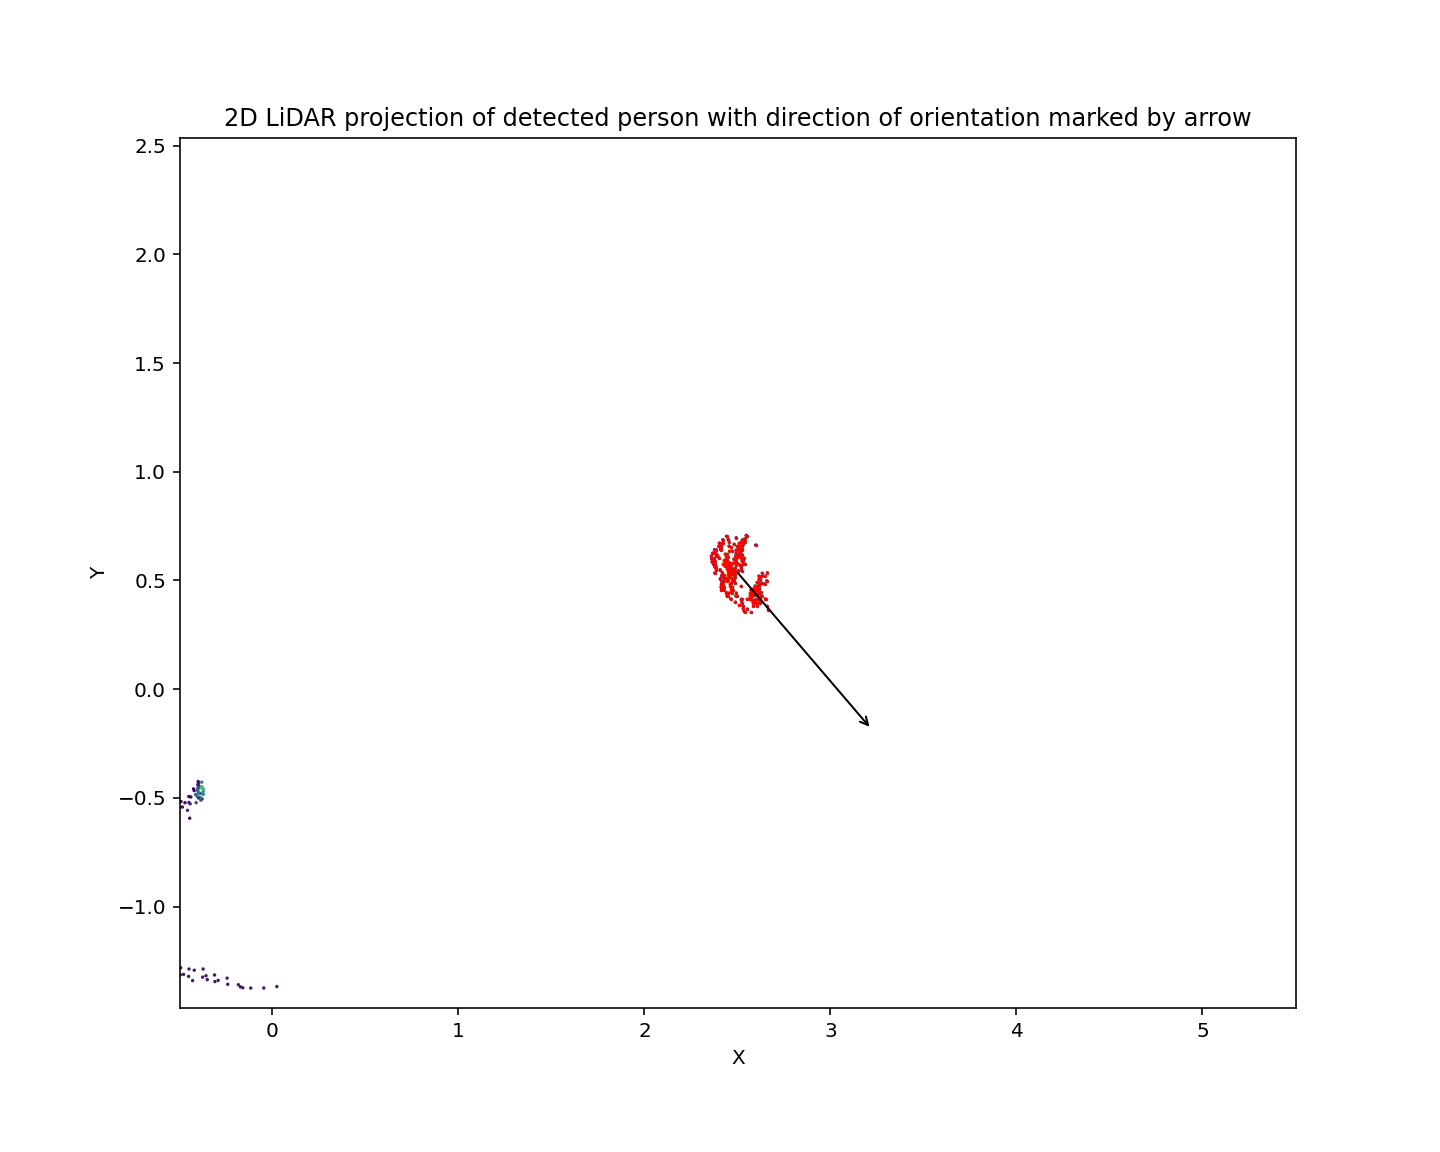

Orientation angle: -0.79 [rad] / -45.00 [deg]


In [49]:
%matplotlib notebook

# plot data
f2 = plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], alpha=2, s=0.5, c=data[:, 3], cmap='viridis')
template = data[mask]
plt.scatter(template[:, 0], template[:, 1], s=0.5, c='r')
plt.xlabel('X')
plt.ylabel('Y')

center =centroid[0:2]
plt.xlim(center[0]-3, center[0]+3)
plt.ylim(center[1]-2, center[1]+2)
plt.title("2D LiDAR projection of detected person with direction of orientation marked by arrow")

# Return the arc tangens of y/x in radians from -pi to pi 
orient_angle, pca = calc_heading_angle(data, mask)
print('Orientation angle: {:.2f} [rad] / {:.2f} [deg]'.format(orient_angle, math.degrees(orient_angle)))
draw_vector(center, center + pca['components'][0])

plt.show()
# save_fig_in_folder(f2, path, keyword='orientation_scale_all_data_zoom2')

## Visualizations

Visualizations are implemented with two different tools. Both are meant to facilitate the evaluation of detections and annotations of the bounding boxes. You can either use Mayavi or Matplotlib, whereas the former has a more interactive notebook mode.

### Using Mayavi
Inspired by authors of [Frustum PointNet](https://github.com/charlesq34/frustum-pointnets/blob/master/mayavi/viz_util.py).

#### Source code

In [12]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()

from mayavi import mlab
mlab.init_notebook('ipy')

Notebook initialized with ipy backend.


In [13]:
def draw_lidar_simple(pc, color=None):
    ''' Draw lidar points. simplest set up. '''
    bgcolor = (1,1,1) # black, white=(0,0,0)
    print('Got point cloud of shape {}'.format(pc.shape))
    fig = mlab.figure(figure=None, bgcolor=bgcolor, fgcolor=None, engine=None, size=(1600, 1000))
    if color is None: 
        color = pc[:,2]
    #draw points
        # draw points
    mlab.points3d(
        pc[:, 0],
        pc[:, 1],
        pc[:, 2],
        color,
        color=None,
        mode="point",
        colormap="spectral", # 'gnuplot'
        scale_factor=1,
        figure=fig,
    )
    #draw origin
    mlab.points3d(0, 0, 0, color=(1,1,1), mode='sphere', scale_factor=0.2)
    #draw axis
    axes=np.array([
        [2.,0.,0.,0.],
        [0.,2.,0.,0.],
        [0.,0.,2.,0.],
    ],dtype=np.float64)
    
    mlab.plot3d([0, axes[0,0]], [0, axes[0,1]], [0, axes[0,2]], color=(1,0,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[1,0]], [0, axes[1,1]], [0, axes[1,2]], color=(0,1,0), tube_radius=None, figure=fig)
    mlab.plot3d([0, axes[2,0]], [0, axes[2,1]], [0, axes[2,2]], color=(0,0,1), tube_radius=None, figure=fig)
#     mlab.view(azimuth=180, elevation=70, focalpoint=[ 12.0909996 , -1.04700089, -2.03249991], distance=10.0, figure=fig)
    return fig

In [40]:
def draw_gt_boxes3d(gt_boxes3d, fig, color=(1,0,0), line_width=1, draw_text=True, text_scale=(0.8,0.8,0.8), color_list=None):
    ''' Draw 3D bounding boxes
    Args:
        gt_boxes3d: numpy array (n,8,3) for XYZs of the box corners
        fig: mayavi figure handler
        color: RGB value tuple in range (0,1), box line color
        line_width: box line width
        draw_text: boolean, if true, write box indices beside boxes
        text_scale: three number tuple
        color_list: a list of RGB tuple, if not None, overwrite color.
    Returns:
        fig: updated fig
    ''' 
    num = len(gt_boxes3d)
    print("Got {} boxes to draw".format(num))
    for n in range(num):
        b = gt_boxes3d[n]
        if color_list is not None:
            color = color_list[n] 
        if draw_text: mlab.text3d(b[4,0], b[4,1], b[4,2], '%d'%n, scale=text_scale, color=color, figure=fig)
        for k in range(0,4):
            #http://docs.enthought.com/mayavi/mayavi/auto/mlab_helper_functions.html
            i,j=k,(k+1)%4
            mlab.plot3d([b[i,0], b[j,0]], [b[i,1], b[j,1]], [b[i,2], b[j,2]], color=color, tube_radius=None, line_width=line_width, figure=fig)

            i,j=k+4,(k+1)%4 + 4
            mlab.plot3d([b[i,0], b[j,0]], [b[i,1], b[j,1]], [b[i,2], b[j,2]], color=color, tube_radius=None, line_width=line_width, figure=fig)

            i,j=k,k+4
            mlab.plot3d([b[i,0], b[j,0]], [b[i,1], b[j,1]], [b[i,2], b[j,2]], color=color, tube_radius=None, line_width=line_width, figure=fig)
    return fig

#### Testing

In [63]:
fig = draw_lidar_simple(data)
draw_gt_boxes3d(corners3d_boxes, fig)

Got point cloud of shape (9580, 4)
Got 0 boxes to draw


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06@\x00\x00\x03\xe8\x08\x02\x00\x00\x00\t\x19\xa5\x…

In [39]:
name = 'test_LCAS_{}_flawed_annot_top_view'.format(test_id)
mlab.savefig(filename=os.path.join('../','plots/{}.png'.format(name)))

### Using Matplotlib
Code inspired by [this repo](https://github.com/navoshta/KITTI-Dataset/blob/master/kitti-dataset.ipynb).

#### source code

In [149]:
x_center, y_center = centroid[0:2]

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D


def draw_box(pyplot_axis, vertices, axes=[0, 1, 2], color='black'):
    """
    Draws a bounding 3D box in a pyplot axis.
    
    Parameters
    ----------
    pyplot_axis : Pyplot axis to draw in.
    vertices    : Array 8 box vertices containing x, y, z coordinates.
    axes        : Axes to use. Defaults to `[0, 1, 2]`, e.g. x, y and z axes.
    color       : Drawing color. Defaults to `black`.
    """
    vertices = vertices[axes, :]
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]  # Connections between upper and lower planes
    ]
    for connection in connections:
        pyplot_axis.plot(*vertices[:, connection], c=color, lw=0.5)

def display_bboxes_in_data(dataset, gt_boxes3d, plot=True, angle=False, label=None, bbox=None, outliers=None):
    """
    Displays the (ground truth) bounding boxes corresponding to the detection/label within the scatter 
    plot of the LiDAR data within 4 plots (one in 3D, and 3 projections).
    
    Parameters
    ----------
    dataset         : `raw` dataset.
    gt_boxes3d      : numpy nd array with bbox defined by its 8 vertices (in 3d spatial coordinates)
    """
    
    # Size of point markers in plots
    point_size = 0.3
    axes_str = ['X', 'Y', 'Z']
    if label is not None: 
        template_mask = np.where(label)
        background_mask = np.where(~label)
    else: 
        template_mask = None
        background_mask = None 

    def draw_point_cloud(ax, title, template_mask=None, background_mask=None, axes=[0, 1, 2], xlim3d=None, 
                         ylim3d=None, zlim3d=None, outliers=outliers, plot=plot):
        """
        Convenient method for drawing various point cloud projections as a part of frame statistics.
        """
        # Size of point markers in plots
        point_size = 0.5
        point_size_template = 2.0
        if not xlim3d and template_mask is not None: 
            legend_elements = [
                Line2D([0], [0], marker='o', color='w', label='Positive label', markerfacecolor='r', markersize=10)
                ]
            if label is not None: 
                template = dataset[template_mask]
                background = dataset[background_mask]
                ax.scatter(*np.transpose(background[:, axes]), s=point_size, c=background[:, 3], cmap='viridis')
                ax.scatter(*np.transpose(template[:, axes]), s=point_size_template, c='r', marker='x')
            else: 
                ax.scatter(*np.transpose(dataset[:, axes]), s=point_size, c=dataset[:, 3], cmap='viridis')
            if outliers is not None: 
                ax.scatter(*np.transpose(outliers[:,axes]), s=point_size*10, c='b')
            ax.legend(handles=legend_elements, loc='upper right')
        else: 
            ax.scatter(*np.transpose(dataset[:, axes]), s=point_size, c=dataset[:, 3], cmap='viridis')
        ax.set_title(title)
        ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
        ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
        if len(axes) > 2:
            ax.set_xlim3d(*axes_limits[axes[0]])
            ax.set_ylim3d(*axes_limits[axes[1]])
            ax.set_zlim3d(*axes_limits[axes[2]])
            ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
        else:
            ax.set_xlim(*axes_limits[axes[0]])
            ax.set_ylim(*axes_limits[axes[1]])
#         User specified limits
        if xlim3d!=None:
            ax.set_xlim3d(xlim3d)
        if ylim3d!=None:
            ax.set_ylim3d(ylim3d)
        if zlim3d!=None:
            ax.set_zlim3d(zlim3d)
        
        num = len(gt_boxes3d)
        for n in range(num):
            b = gt_boxes3d[n].T
            draw_box(ax, b, axes=axes, color='r')
            
    # Draw point cloud data as 3D plot
    f2 = plt.figure(figsize=(10, 8))
    ax2 = f2.add_subplot(111, projection='3d')                    
    draw_point_cloud(ax2, 'Velodyne scan',template_mask=template_mask,background_mask=background_mask, xlim3d=axes_limits[0],ylim3d=axes_limits[1], zlim3d=axes_limits[2])
    if plot:
        plt.show()
    
    # Draw point cloud data as plane projections
    f, ax3 = plt.subplots(3, 1, figsize=(10, 15))
    draw_point_cloud(
        ax3[0], 
        'Velodyne scan, XZ projection (Y = 0)', 
        template_mask=template_mask,
        background_mask=background_mask,
        axes=[0, 2], # X and Z axes
        outliers=outliers
    )
    draw_point_cloud(
        ax3[1], 
        'Velodyne scan, XY projection (Z = 0)', 
        template_mask=template_mask,
        background_mask=background_mask,
        axes=[0, 1], # X and Y axes
        outliers=outliers
    )
#     if (angle) & (label_mask != None) & (type(bbox)== np.ndarray):
#         _, pca_stats = calc_heading_angle(dataset, label_mask)
#         v = pca_stats['components'][0]
#         centroid = bbox[0:2]
#         draw_vector(centroid, centroid + v, ax=ax3[1])

    draw_point_cloud(
        ax3[2], 
        'Velodyne scan, YZ projection (X = 0)',
        template_mask=template_mask,
        background_mask=background_mask,
        axes=[1, 2], # Y and Z axes
        outliers=outliers
    )
    if plot: 
        plt.show()
    return f, f2

#### Testing

In [90]:
%matplotlib notebook

In [111]:
plt.close('all')

In [ ]:
WALK = True
if not WALK:           # static datasets 
    axes_limits = [
        [dist-2, dist+2], # X axis range
        [-1, 2], # Y axis range
        [-0.5, 3]   # Z axis range
    ]
else: 
    # walking datasets
    x_center, y_center =centroid[0:2]
    axes_limits = [
        [x_center-3, x_center+3], # X axis range
        [y_center-2, y_center+2], # Y axis range
        [-0.5, 3]   # Z axis range
    ]

<IPython.core.display.Javascript object>


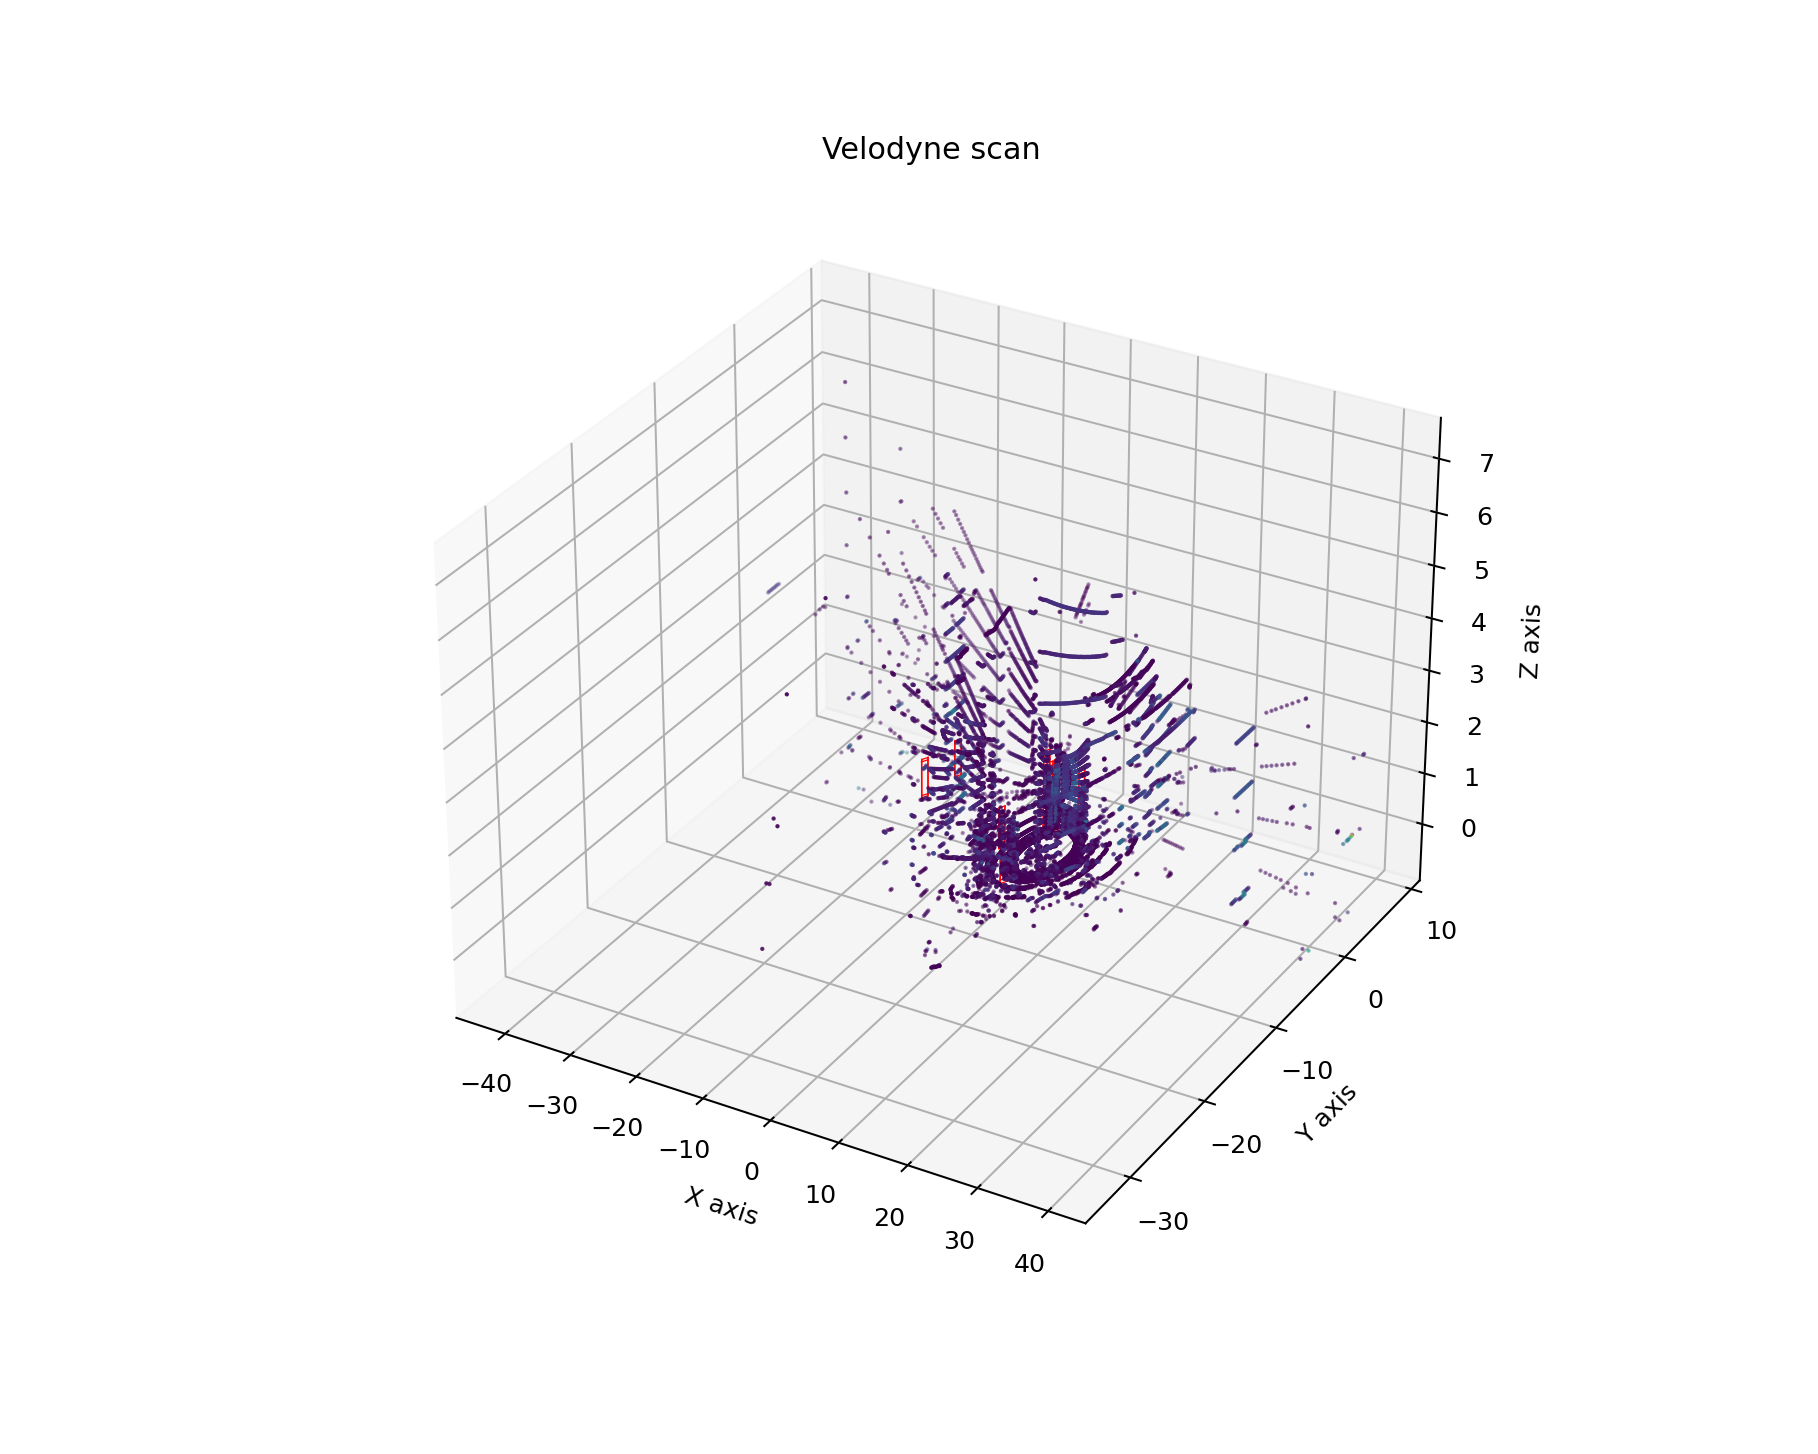

<IPython.core.display.Javascript object>


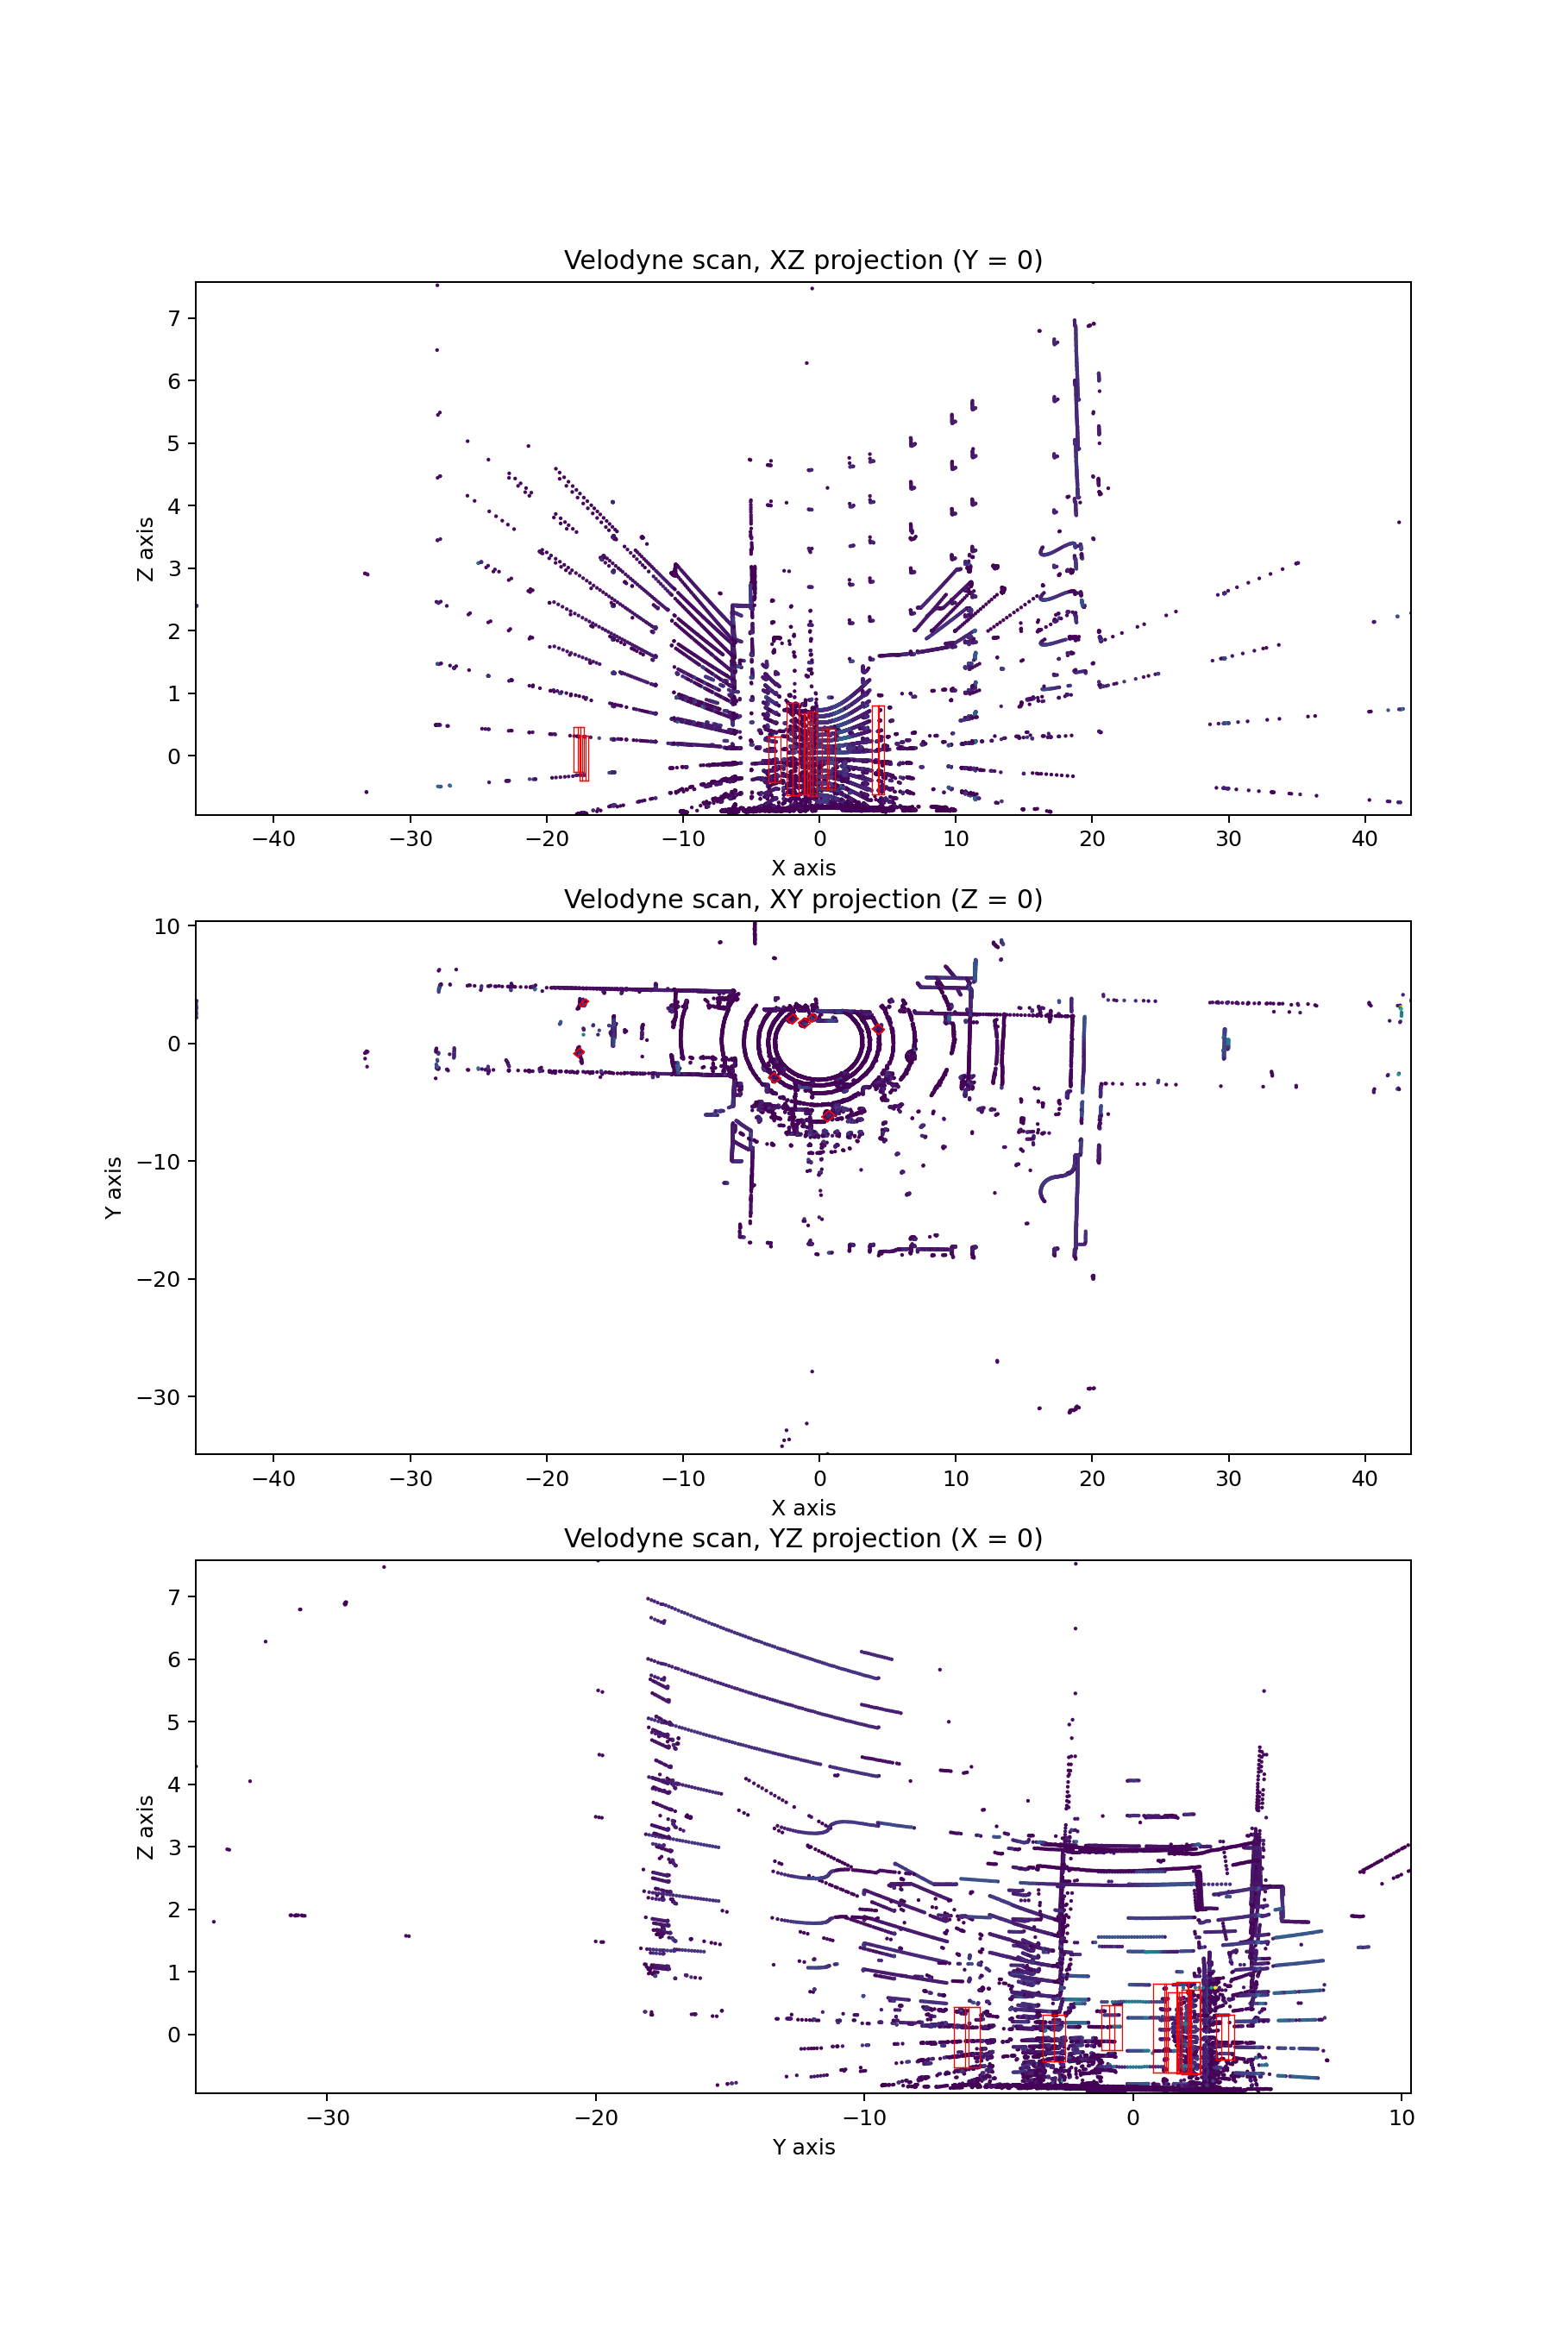

In [163]:
# LCAS: 
axes_limits = [
        [-15, 15], # X axis range
        [-15, 10], # Y axis range
        [-2, 3]   # Z axis range
    ]
x_max, x_min = np.max(data[:,0]), np.min(data[:,0])
y_max, y_min = np.max(data[:,1]), np.min(data[:,1])
z_max, z_min = np.max(data[:,2]), np.min(data[:,2])

axes_limits = [
    [x_min, x_max], # X axis range
    [y_min, y_max], # Y axis range
    [z_min, z_max]   # Z axis range
]
detections_proj, fig3d = display_bboxes_in_data(data, corners3d_boxes, angle=False)

In [ ]:
detections_proj, fig3d = display_bboxes_in_data(data, corners3d_box, angle=False, label=label)

In [ ]:
detections_proj, fig3d = display_bboxes_in_data(data, corners3d_box, angle=False, label=label, outliers=outliers)

In [123]:
save_path = '/home/crowdbot/master_lara/plots'

In [152]:
save_fig_in_folder(fig, save_path, name='walk_person_166_1_rot')

Saving figure in /home/crowdbot/master_lara/plots/plots


## Validate Annotations

Find outliers in positively labeled point segments, because they can influence the box dimensions (i.e. height, width, length). Outlier search based on k-nearest neighbor distance score. Threshold found by trial and error. 

### Outlier Detection

In [59]:
from sklearn.neighbors import NearestNeighbors
from pyod.models.knn import KNN   # kNN detector
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import NearestNeighbors

final_data = data
print('Number of points: {}'.format(data.shape[0]))

# filter data for only positive labels and do bbox calculations only on mask
mask = np.where(label) 
filter_data = final_data[mask]
print('Template Points: {}'.format(len(filter_data)))

# remove floor points from data 
ground_mask = np.where(filter_data[:,2] >= 0)
filter_data = filter_data[ground_mask]

nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(filter_data[:,:2])
distances, indices = nbrs.kneighbors(filter_data[:,:2])
mean_dists = distances.mean(axis=1)
print('Mean avg dist. to 5 closest neighbors: {}'.format(np.round(np.mean(mean_dists),decimals=4)))

outlier_mask = np.where(mean_dists>0.1)
inlier_mask = np.where(mean_dists<=0.1)
print('Number of detected outliers:{}'.format(len(outlier_mask[0])))
outliers = filter_data[outlier_mask]
filter_data = filter_data[inlier_mask]
    
# calculate centroid from pointcloud only using spatial coordinates
centroid = filter_data[:,:3].mean(axis=0)

min_x, min_y, min_z = np.min(filter_data[:,0]), np.min(filter_data[:,1]), np.min(filter_data[:,2])
max_x, max_y, max_z = np.max(filter_data[:,0]), np.max(filter_data[:,1]), np.max(filter_data[:,2])

# create bounding box parameters (h,w,l)
h = max_z - 0 # assume that legs always on ground  
w = max_x - min_x
l = max_y - min_y

centroid[2] = h/2

# enlarge bbox by a small constant 
const = 0.1
h = h + const 
w = w + const 
l = l + const 

# Compute orientation 
orient_angle, pca = calc_heading_angle(filter_data, label)
# pca_stats = [pca['mean'], pca['components']]

bbox = np.concatenate((centroid, (h,w,l), ([orient_angle])))
gt_box = np.reshape(bbox, (-1,7))
corners3d_box = boxes3d_to_corners3d_velodyne(gt_box)

Number of points: 8487
Template Points: 91
Mean avg dist. to 5 closest neighbors: 0.0888
Number of detected outliers:27


### Validation Pipeline

Take a random subsample per frame and save corresponding plot. For means of crossvalidation.

In [ ]:
%matplotlib inline
for folder in sorted(os.listdir(DATA_DIR)):
    if folder.startswith('person'):
        print('---------------------')
        print(folder)
        path = os.path.join(DATA_DIR, folder) 
        data_files = [str(f) for f in sorted(os.listdir(path)) if f.endswith('.h5')] 
        dist = int(folder.split('_')[-1])
        
        # create subdirectory to save plots 
        SAVE_DIR = os.path.join(path, 'plots')
        if os.path.exists(SAVE_DIR):
            pass # File has already been processed
        else:
            os.makedirs(SAVE_DIR)
            
        # downsample frames 
        frame_sample = data_files[::20]
        print('Validating {}/{} frames'.format(len(frame_sample), len(data_files)))
        
        for frame in frame_sample: 
            # load data 
            f = os.path.join(path, frame)
            data, label, bbox = load_h5(f, bbox=True)
            centroid, h, w, l, angle = bbox[0:3], bbox[3], bbox[4], bbox[5], bbox[6]
            mask = np.where(label)
            template = data[mask]
            # calculate bounding box on labeled data 
            box8 = calc_3d_box(bbox)
            gt_box = np.reshape(box8, (-1,8,3))
            
#             detections_proj = display_bboxes_in_data(data, gt_box, plot=False)
            
            # static datasets 
            axes_limits = [
                [dist-2, dist+2], # X axis range
                [-1, 2], # Y axis range
                [-0.5, 3]   # Z axis range
            ]

            # walking datasets
#             x_center, y_center =centroid[0:2]
#             axes_limits = [
#                 [x_center-3, x_center+3], # X axis range
#                 [y_center-2, y_center+2], # Y axis range
#                 [-0.5, 3]   # Z axis range
#             ]
            
            detections_proj = display_bboxes_in_data(data, gt_box, label=label, bbox=bbox, plot=False)
            frame_name = str.rstrip(frame, '.h5')
            save_fig(detections_proj, os.path.join(SAVE_DIR, frame_name), extension='.png')
            plt.close('all')

Check bounding box annotations for a given anchor box. If the residual for all dimensions (height, length, width) exceeds a given threshold, they will be written to a file and a plot will be saved, in order to visually validate, if the annotation has been wrongly derived. 

In [ ]:
anchor = [1.73, 0.6, 0.8] # h,w,l
save_path = '/home/crowdbot/master_lara/plots/wrong_annotations'

%matplotlib inline
for folder in sorted(os.listdir(DATA_DIR)):
    if folder.startswith('walk'):
        path = os.path.join(DATA_DIR, folder) 
        data_files = [str(f) for f in sorted(os.listdir(path)) if f.endswith('.h5')] 
        dist = int(folder.split('_')[-1])
        if dist <= 8: 
            print('---------------------')
            print(folder)
            print('Validating {} frames'.format(len(data_files)))

            height_list = []
            width_list = []
            length_list = []
            res_h_list = []
            res_w_list = []
            res_l_list = []
            total_res_list = []
            for frame in data_files: 
                # load data 
                f = os.path.join(path, frame)
                data, label, bbox = load_h5(f, bbox=True)
                centroid, h, w, l, angle = bbox[0:3], bbox[3], bbox[4], bbox[5], bbox[6]
                height_list.append(h)
                width_list.append(w)
                length_list.append(l)
                res_h = np.abs(h - anchor[0])
                res_w = np.abs(w - anchor[1])
                res_l = np.abs(l - anchor[2])
                total_res = np.sum([res_h, res_w, res_l])
                res_h_list.append(res_h)
                res_w_list.append(res_w)
                res_l_list.append(res_l)
                total_res_list.append(total_res)

                mask = np.where(label)
                template = data[mask]
                # calculate bounding box on labeled data 
                box8 = calc_3d_box(bbox)
                gt_box = np.reshape(box8, (-1,8,3))

                # static datasets 
#                 axes_limits = [
#                     [dist-2, dist+2], # X axis range
#                     [-1, 2], # Y axis range
#                     [-0.5, 3]   # Z axis range
#                 ]

#                 walking datasets
                x_center, y_center =centroid[0:2]
                axes_limits = [
                    [x_center-3, x_center+3], # X axis range
                    [y_center-2, y_center+2], # Y axis range
                    [-0.5, 3]   # Z axis range
                ]

                frame_name = str.rstrip(frame, '.h5')
                if total_res > 1.5: 
                    # create subdirectory to save plots 
                    SAVE_DIR = os.path.join(save_path, folder)
                    if os.path.exists(SAVE_DIR):
                        pass # File has already been processed
                    else:
                        os.makedirs(SAVE_DIR)
                    detections_proj, fig3d = display_bboxes_in_data(data, gt_box, label=label, bbox=bbox, plot=False)
                    save_fig(detections_proj, os.path.join(SAVE_DIR, frame_name), extension='.png')
                    save_fig(fig3d, os.path.join(SAVE_DIR, '3D_'+frame_name), extension='.png')
                    plt.close('all')
                    print('{}:{}'.format(frame_name, total_res))
                    
    #         print('{}: \navg h,w,l {}\navg res h,w,l {}\navg residual: {}'.format(
#                     frame_name, (np.mean(height_list), np.mean(width_list), np.mean(length_list)),
#                     (np.mean(res_h_list), np.mean(res_w_list), np.mean(res_l_list)), np.mean(total_res_list)))

Plot all frames for a given recording: 

In [ ]:
anchor = [1.73, 0.6, 0.8] # h,w,l
save_path = '/home/crowdbot/master_lara/plots/'

# print all frames of given recording
%matplotlib inline
for folder in sorted(os.listdir(DATA_DIR)):
    if folder.startswith('walk_person166_3'):
        path = os.path.join(DATA_DIR, folder) 
        data_files = [str(f) for f in sorted(os.listdir(path)) if f.endswith('.h5')] 
        dist = int(folder.split('_')[-1])
        if dist <= 8: 
            print('---------------------')
            print(folder)
            print('Validating {} frames'.format(len(data_files)))
            # create subdirectory to save plots 
            SAVE_DIR = os.path.join(save_path, folder)
            if os.path.exists(SAVE_DIR):
                pass # File has already been processed
            else:
                os.makedirs(SAVE_DIR)

            for frame in data_files: 
                # load data 
                f = os.path.join(path, frame)
                data, label, bbox = load_h5(f, bbox=True)
                centroid, h, w, l, angle = bbox[0:3], bbox[3], bbox[4], bbox[5], bbox[6]

                # calculate bounding box on labeled data 
                box8 = calc_3d_box(bbox)
                gt_box = np.reshape(box8, (-1,8,3))

                # static datasets 
#                 axes_limits = [
#                     [dist-2, dist+2], # X axis range
#                     [-1, 2], # Y axis range
#                     [-0.5, 3]   # Z axis range
#                 ]

#                 walking datasets
                x_center, y_center =centroid[0:2]
                axes_limits = [
                    [x_center-3, x_center+3], # X axis range
                    [y_center-2, y_center+2], # Y axis range
                    [-0.5, 3]   # Z axis range
                ]

                frame_name = str.rstrip(frame, '.h5')
                    
                detections_proj, fig3d = display_bboxes_in_data(data, gt_box, label=label, bbox=bbox, plot=False)
                save_fig(detections_proj, os.path.join(SAVE_DIR, frame_name), extension='.png')
                save_fig(fig3d, os.path.join(SAVE_DIR, '3D_'+frame_name), extension='.png')
                plt.close('all')

## Data Overview

In [28]:
data.shape

(4912377, 6)

In [29]:
data.head()

,rosbagTimestamp,x,y,z,intensity,time
0,1590775583702332952,-1.055055,1.817870,-0.563190,6.0,-0.048886
1,1590775583702332952,-3.424826,5.905756,0.119165,42.0,-0.048884
2,1590775583702332952,-1.224575,2.112502,-0.563727,4.0,-0.048882
3,1590775583702332952,-3.431576,5.924548,0.358815,26.0,-0.048879
4,1590775583702332952,-1.482979,2.562392,-0.575480,1.0,-0.048877


In [43]:
# investigate value ranges
x_max, x_min = np.max(data.x), np.min(data.x)
y_max, y_min = np.max(data.y), np.min(data.y)
z_max, z_min = np.max(data.z), np.min(data.z)
intensity_max, intensity_min = np.max(data.intensity), np.min(data.intensity)

print('x_max: {:.3f}, x_min: {:.3f}'.format(x_max, x_min))
print('y_max: {:.3f} y_min: {:.3f}'.format(y_min, y_max))
print('z_max: {:.3f}, z_min: {:.3f}'.format(z_max, z_min))
print('intensity_max: {:.3f}, intensity_min: {:.3f}'.format(intensity_max, intensity_min))
print('\nNumber of points: {}'.format(data.shape[0]))

x_max: 49.444, x_min: -4.745
y_max: -37.609 y_min: 35.406
z_max: 4.689, z_min: -1.359
intensity_max: 131.000, intensity_min: 0.000

Number of points: 3908367


In [95]:
data.z.mean()

0.46101681533919564

## Backup

### Create PCD Files 

In [30]:
timesteps = data.rosbagTimestamp.unique()
path = bag_dir + '/' + dropdown.value
os.mkdir(path)
thresh = 0 
for i,t in enumerate(timesteps):    
    # Analyze pointcloud from timestamp chosen above 
    oneframe_data = data[data.rosbagTimestamp == t].reset_index(drop=True)
    # Rotate & translate points to compensate for LiDAR tilt angle 
    oneframe_data_trans = df_apply_rot(oneframe_data, quat, return_full_df=True)
    oneframe_data_trans = translate_height(oneframe_data_trans, z_trans)
    # Remove ground points
    oneframe_data_trans_no_floor = remove_ground_points(oneframe_data_trans, thresh)
    # Filter by radius 
    oneframe_data_trans_no_floor = add_polar_coord(oneframe_data_trans_no_floor)
    label_mask = oneframe_data_trans_no_floor.r.between(*interval)
    oneframe_data_trans_no_floor['label'] = label_mask
    # Create template 
    template = oneframe_data_trans_no_floor[oneframe_data_trans_no_floor.label].reset_index(drop=True)
    # Save as binary matrix file for annotation
    temp_frame = template[['x','y','z']].copy()
#     temp = temp_frame.to_numpy(dtype='float32').astype('float32')
    temp = temp_frame.to_numpy()
    p = pcl.PointCloud(np.array(temp, dtype=np.float32))
    p.to_file(path + '/frame_{}_{}.pcd'.format(i,t))
#     temp.tofile(path + '/frame{}.bin'.format(t),  format="%f")

### Visualizations

#### 3D Plot using matplotlib

In [ ]:
%matplotlib notebook

In [ ]:
plot_pointcloud3d(start)

#### 3D Plot using pptk
See documentation [here](https://heremaps.github.io/pptk/index.html). 
Example screenshot of interactive 3D visualzation:
<img src="files/pcl_1585676368204491882.png">

In [113]:
import pptk

In [43]:
v = pptk.viewer(template_no_floor[['x', 'y', 'z']]) 
v.attributes(template_no_floor['intensity'])
v.set(point_size=0.01)

In [ ]:
v.capture('/home/brudermueller/Downloads/pcl_{}.png'.format(str(timesteps[0])))

In [139]:
# take only every 40th timestep
subsample = timesteps[::40]

In [ ]:
pcl = data[data.rosbagTimestamp == timesteps[150]].reset_index()
pcl = df_apply_rot(pcl)
pcl = remove_ground_points(pcl, -0.38)
pcl.head()
pcl = pcl[(pcl.x.between(2.9, 3.5)) & (pcl.y.between(-1, 2))]
v = pptk.viewer(pcl[['x', 'y', 'z']]) 
v.attributes(pcl['intensity'])
v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=7)   

In [55]:
# save screenshot of lidar 3D plot for each timestep 
import time
templates = data_trans[data_trans.label].reset_index(drop=True)
# templates = data_trans_no_floor[data_trans_no_floor.label].reset_index(drop=True)

# templates = remove_ground_points(templates, 0)
for i,t in enumerate(timesteps[::10]): 
    pcl = templates[templates.rosbagTimestamp == t].reset_index(drop=True)
    if pcl.empty:
        print t
        continue
    v = pptk.viewer(pcl[['x', 'y', 'z']]) 
    v.attributes(pcl['intensity'])
    v.set(point_size=0.01, lookat=(4.5, -0.5, -1), r=10)    
    time.sleep(2)
#     v.capture('/home/brudermueller/Downloads/med/pcl_templates_{}_{}.png'.format(dropdown.value, i))
#     time.sleep(2)
    v.close()

In [ ]:
v = pptk.viewer(start_ground[['x', 'y', 'z']]) 
v.attributes(start_ground['intensity'])
v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=10)

In [ ]:
v = pptk.viewer(start[['x', 'y', 'z']]) 
v.attributes(start['intensity'])
v.set(point_size=0.001, lookat=(5, 0.5, 1.5), r=10)